In [4]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np

#loading the data
path_data = '../data_BAMB/behaviour_EEG_syn/'

In [36]:
# name_file = 'sub016_sess001_behav_syn'
# mat = scipy.io.loadmat(str(path_data) + str(name_file) + '.mat')
# mat = scipy.io.loadmat(str(name_file) + '.mat')

subject = 16
sess = 1
mat = loadmat(str(path_data) + '/sub' + str(subject).zfill(3) + '_sess' + str(sess).zfill(3) +\
                       '_behav_syn.mat')
print(mat.keys())


# mat['respMat'][0,0].shape

In [37]:
trigger_vals = mat['B'][0,0][12][0,:]
trigger_vals = np.array([el[:,0] for el in trigger_vals])
print(trigger_vals.shape)

coherence_frame = mat['B'][0,0][14][0,:]
coherence_frame = np.array([el[:,0] for el in coherence_frame])
print(coherence_frame.shape)

(4, 30013)
(4, 30013)


In [38]:
for i in range(4):
    print(np.unique(trigger_vals[i,:]))
#     plt.plot(coherence_frame[i])
#     plt.plot(trigger_vals[i,:])
#     plt.xlim(0,100)
#     plt.show()

[  0  11  12  13  14  15  16  17  18  19  23  24  30  40  50 102 103 104
 105 106 130 140 150 201 202 203 205 206 210]
[  0  11  12  13  14  15  16  17  18  19  23  24  30  40  50 102 103 104
 105 106 130 140 150 201 202 203 205 206 210]
[  0  11  12  13  14  15  16  17  18  19  23  24  30  40  50 102 103 104
 105 106 130 140 150 201 202 203 205 206 210]
[  0  11  12  13  14  15  16  17  18  19  23  24  30  40  50 102 103 104
 105 106 130 140 150 201 202 203 205 206 210]


In [39]:
print(trigger_vals.shape)
print(trigger_vals.shape[1])
resp = np.zeros((4,trigger_vals.shape[1]))
print(resp.shape)

for cond in range(4):
    for trigger_value_left in [205,206]:
        resp[cond,trigger_vals[cond,:] == trigger_value_left] = -1
    for trigger_value_right in [201,202]:
        resp[cond,trigger_vals[cond,:] == trigger_value_right] = 1
print(resp)

(4, 30013)
30013
(4, 30013)
[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ... -1.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]


In [40]:
for cond in range(4):
    print("-------- cond",cond,"-------------")
    for value in [-1,0,1]:
        print("response",value,"happens", np.sum(resp[cond,:] == value),"times")

-------- cond 0 -------------
response -1 happens 14 times
response 0 happens 29982 times
response 1 happens 17 times
-------- cond 1 -------------
response -1 happens 8 times
response 0 happens 30001 times
response 1 happens 4 times
-------- cond 2 -------------
response -1 happens 25 times
response 0 happens 29964 times
response 1 happens 24 times
-------- cond 3 -------------
response -1 happens 13 times
response 0 happens 29991 times
response 1 happens 9 times


In [42]:
X_all_cond = []
for cond in range(4):
    X = []
    nframes = 500 #number of frames taken (to go back in time)
    for i in range(nframes):
        beginning = 500-i
        end = coherence_frame.shape[1] - i
        X.append(coherence_frame[cond,beginning:end])
    X = np.array(X)
    print(X.shape)
    
    X_all_cond.append(X)
    
X_all_cond = np.array(X_all_cond)
print(X_all_cond.shape)

(500, 29513)
(500, 29513)
(500, 29513)
(500, 29513)
(4, 500, 29513)
float64


(29513, 500) (29513,)
(3, 500)


/home/vincent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


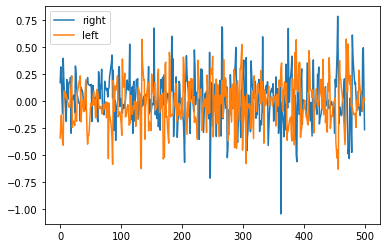

(29513, 500) (29513,)
(3, 500)


/home/vincent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


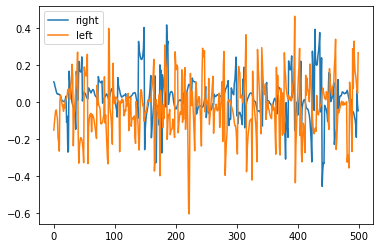

(29513, 500) (29513,)
(3, 500)


/home/vincent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


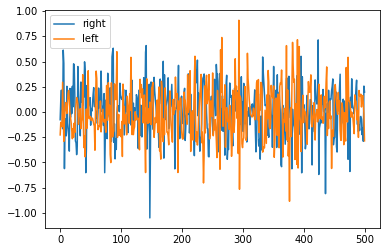

(29513, 500) (29513,)
(3, 500)


/home/vincent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


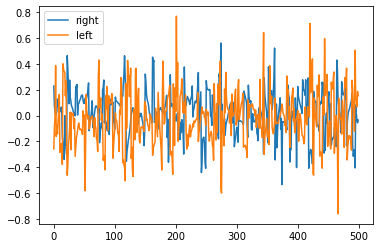

In [8]:
#logistic regression
from sklearn.linear_model import LogisticRegression

weights_fitted = []
for cond in range(4):
    X = X_all_cond[cond].T
    y = resp[cond][nframes:]
    print(X.shape,y.shape)
    
    clf = LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='multinomial').fit(X, y)
    weights = clf.coef_
    print(weights.shape)
    weights_right = weights[2,:] 
    weights_left = weights[0,:]
    plt.plot(weights_right, label='right')
    plt.plot(weights_left, label='left')
    plt.legend()
    plt.show()
#     clf.predict(X[:2, :])
#     clf.predict_proba(X[:2, :]) 
#     clf.score(X, y)
    
    weights_fitted.append(weights)
weights_fitted = np.array(weights_fitted)

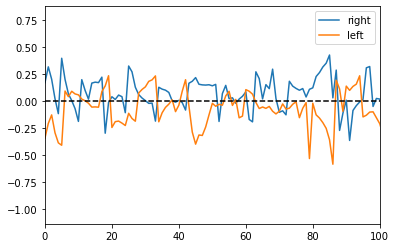

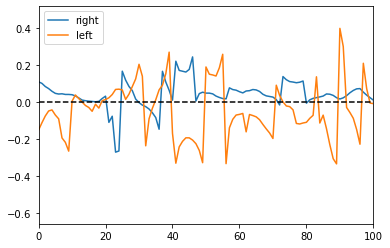

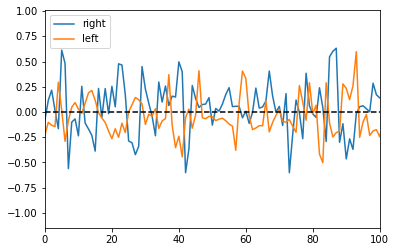

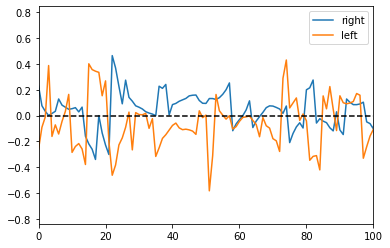

In [154]:
for cond in range(4):
    weights = weights_fitted[cond,:]
    
    weights_right = weights[2,:] 
    weights_left = weights[0,:]
    plt.plot(weights_right, label='right')
    plt.plot(weights_left, label='left')
    plt.legend()
    plt.xlim(0,100)
    plt.axhline(y=0,color='black',linestyle='--')
    plt.show()

In [ ]:
#todo: downsample

# Across subjects

In [30]:
a = 
print(a)
# print(a[0])
# print(a[1])

[1, 3, 2, 4]


In [91]:
from sklearn.linear_model import LogisticRegression


subjects = [16,18,19,20,21,24,26,28,32,34,35,40,41,51,52] #there are 15 subjects
sessions = [1,2,3,4,5,6] #6 sessions by subject (with 4 conditions each)

nsubjects = len(subjects) #15
nsessions = len(sessions) #6
nconditions = 4 #number of conditions

last_dim_truncate = 29490 #minimum (on all the subjects and sessions) of the number of time bins in a {session,condition]
nframes = 500 #number of frames taken (to go back in time)

# X_all = np.zeros((last_dim_truncate, nframes, nconditions, nsubjects, nsessions)) #too big
# print(X_all.shape)
weights_fitted_subjects = []
for subject in subjects:
    print("subject",subject)
    
    X_all_cond_dict = {1:[], 2:[], 3:[], 4:[]}
    resp_all_cond_dict = {1:[], 2:[], 3:[], 4:[]}
    
    for sess in sessions:
        mat = loadmat(str(path_data) + '/sub' + str(subject).zfill(3) + '_sess' + str(sess).zfill(3) +\
                       '_behav_syn.mat')
        list_cond = [int(el[0]) for el in mat['S_behav'][0,0][0][0,:]]
        
        trigger_vals = mat['B'][0,0][12][0,:]
        trigger_vals = np.array([el[:,0] for el in trigger_vals])
#         print(trigger_vals.shape)

        coherence_frame = mat['B'][0,0][14][0,:]
        coherence_frame = np.array([el[:,0] for el in coherence_frame])
#         print(coherence_frame.shape)

        resp = np.zeros((4,trigger_vals.shape[1]))
#         print(resp.shape)
        for cond in range(4):
            for trigger_value_left in [205,206]:
                resp[cond,trigger_vals[cond,:] == trigger_value_left] = -1
            for trigger_value_right in [201,202]:
                resp[cond,trigger_vals[cond,:] == trigger_value_right] = 1
#         print(resp)


        for i_cond, cond in enumerate(list_cond):
            resp_all_cond_dict[cond].append(resp[i_cond,:500+last_dim_truncate])
        
        
        X_all_cond = []
        for cond in range(4):
            X = []
            for i in range(nframes):
                beginning = 500-i
                end = coherence_frame.shape[1] - i
                X.append(coherence_frame[cond,beginning:end])
            X = np.array(X)
#             print(X.shape)
            X_all_cond.append(X)
        X_all_cond = np.array(X_all_cond)
#         print(X_all_cond.shape)
        last_dim.append(X_all_cond.shape[2])
        
#         print(X_all_cond_dict)
        #truncate and put into dict (with the condition info)
        for i_cond, cond in enumerate(list_cond):
#             print("shape",X_all_cond.shape)
            X_all_cond_dict[cond].append(X_all_cond[i_cond,:,:last_dim_truncate])
        
    for cond in X_all_cond_dict.keys():
        X_all_cond_dict[cond] = np.concatenate((np.array(X_all_cond_dict[cond])),axis=1)
        
    for cond in resp_all_cond_dict.keys():
        resp_all_cond_dict[cond] = np.concatenate(np.array(resp_all_cond_dict[cond])[:,nframes:])
#         print(resp_all_cond_dict[cond].shape)

    #logistic regression
    weights_fitted = []
    for cond in range(1,5):
        print("   condition",cond)
        X = X_all_cond_dict[cond].T
#         print(X.shape, resp_all_cond_dict[cond].shape)
        y = resp_all_cond_dict[cond]
#         print(X.shape,y.shape)

        clf = LogisticRegression(random_state=0, solver='lbfgs',
                             multi_class='multinomial').fit(X, y)
        weights = clf.coef_
        print(weights.shape)
        weights_right = weights[2,:] 
        weights_left = weights[0,:]
#         plt.plot(weights_right, label='right')
#         plt.plot(weights_left, label='left')
#         plt.legend()
#         plt.show()
    #     clf.predict(X[:2, :])
    #     clf.predict_proba(X[:2, :]) 
    #     clf.score(X, y)

        weights_fitted.append(weights)
    weights_fitted = np.array(weights_fitted)
    print(weights_fitted.shape)
    weights_fitted_subjects.append(weights_fitted)

weights_fitted_subjects = np.array(weights_fitted_subjects)
print(weights_fitted_subjects.shape)

#     for cond in range(4):
#         weights = weights_fitted[cond,:]

#         weights_right = weights[2,:] 
#         weights_left = weights[0,:]
#         plt.plot(weights_right, label='right')
#         plt.plot(weights_left, label='left')
#         plt.legend()
#         plt.xlim(0,100)
#         plt.axhline(y=0,color='black',linestyle='--')
#         plt.show()

subject 16
   condition 1


/home/vincent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


(3, 500)
   condition 2


/home/vincent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


(3, 500)
   condition 3


/home/vincent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


(3, 500)
   condition 4


/home/vincent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


(3, 500)
(4, 3, 500)
subject 18
   condition 1


/home/vincent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


(3, 500)
   condition 2


/home/vincent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


(3, 500)
   condition 3


/home/vincent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


(3, 500)
   condition 4


/home/vincent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


(3, 500)
(4, 3, 500)
subject 19
   condition 1


/home/vincent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


(3, 500)
   condition 2


/home/vincent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


(3, 500)
   condition 3


/home/vincent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


(3, 500)
   condition 4


/home/vincent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


(3, 500)
(4, 3, 500)
subject 20
   condition 1


/home/vincent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


(3, 500)
   condition 2


/home/vincent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


(3, 500)
   condition 3


/home/vincent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


(3, 500)
   condition 4


/home/vincent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


(3, 500)
(4, 3, 500)
subject 21
   condition 1


/home/vincent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


(3, 500)
   condition 2


/home/vincent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


(3, 500)
   condition 3


/home/vincent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


(3, 500)
   condition 4


/home/vincent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


(3, 500)
(4, 3, 500)
subject 24
   condition 1


/home/vincent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


(3, 500)
   condition 2


/home/vincent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


(3, 500)
   condition 3


/home/vincent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


(3, 500)
   condition 4


/home/vincent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


(3, 500)
(4, 3, 500)
subject 26
   condition 1


/home/vincent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


(3, 500)
   condition 2


/home/vincent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


(3, 500)
   condition 3


/home/vincent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


(3, 500)
   condition 4


/home/vincent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


(3, 500)
(4, 3, 500)
subject 28
   condition 1


/home/vincent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


(3, 500)
   condition 2


/home/vincent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


(3, 500)
   condition 3


/home/vincent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


(3, 500)
   condition 4


/home/vincent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


(3, 500)
(4, 3, 500)
subject 32
   condition 1


/home/vincent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


(3, 500)
   condition 2


/home/vincent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


(3, 500)
   condition 3


/home/vincent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


(3, 500)
   condition 4


/home/vincent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


(3, 500)
(4, 3, 500)
subject 34
   condition 1


/home/vincent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


(3, 500)
   condition 2


/home/vincent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


(3, 500)
   condition 3


/home/vincent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


(3, 500)
   condition 4


/home/vincent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


(3, 500)
(4, 3, 500)
subject 35
   condition 1


/home/vincent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


(3, 500)
   condition 2


/home/vincent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


(3, 500)
   condition 3


/home/vincent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


(3, 500)
   condition 4


/home/vincent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


(3, 500)
(4, 3, 500)
subject 40
   condition 1


/home/vincent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


(3, 500)
   condition 2


/home/vincent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


(3, 500)
   condition 3


/home/vincent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


(3, 500)
   condition 4


/home/vincent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


(3, 500)
(4, 3, 500)
subject 41
   condition 1


/home/vincent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


(3, 500)
   condition 2


/home/vincent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


(3, 500)
   condition 3


/home/vincent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


(3, 500)
   condition 4


/home/vincent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


(3, 500)
(4, 3, 500)
subject 51
   condition 1


/home/vincent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


(3, 500)
   condition 2


/home/vincent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


(3, 500)
   condition 3


/home/vincent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


(3, 500)
   condition 4


/home/vincent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


(3, 500)
(4, 3, 500)
subject 52
   condition 1


/home/vincent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


(3, 500)
   condition 2


/home/vincent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


(3, 500)
   condition 3


/home/vincent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


(3, 500)
   condition 4


/home/vincent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


(3, 500)
(4, 3, 500)
(15, 4, 3, 500)


In [92]:
weights_fitted_subjects.shape

(15, 4, 3, 500)

In [6]:
# np.save('weights_fitted_subjects.npy', weights_fitted_subjects)
weights_fitted_subjects = np.load('weights_fitted_subjects.npy')
print(weights_fitted_subjects.shape)

(15, 4, 3, 500)


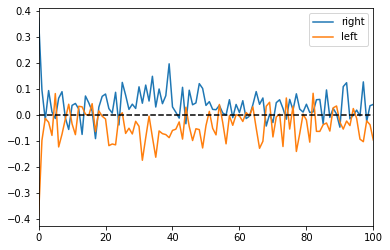

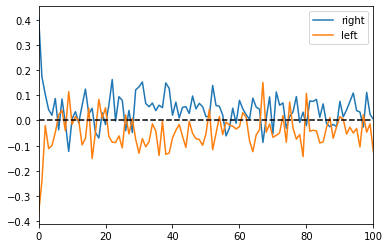

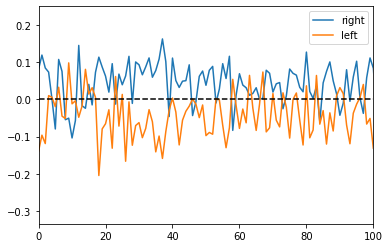

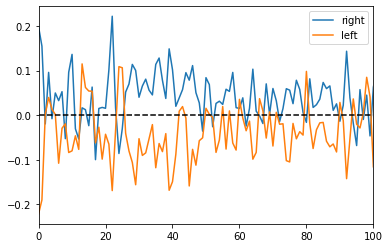

In [13]:
subjects = [16,18,19,20,21,24,26,28,32,34,35,40,41,51,52] #there are 15 subjects
sessions = [1,2,3,4,5,6] #6 sessions by subject (with 4 conditions each)

nsubjects = len(subjects) #15
nsessions = len(sessions) #6
nconditions = 4 #number of conditions

last_dim_truncate = 29490 #minimum (on all the subjects and sessions) of the number of time bins in a {session,condition]
nframes = 500 #number of frames taken (to go back in time)


weights_fitted_subjects_avg = np.mean(weights_fitted_subjects,axis=0)
for cond in range(4):
    weights = weights_fitted_subjects_avg[cond,:]
    weights_right = weights[2,:] 
    weights_left = weights[0,:]
    plt.plot(weights_right, label='right')
    plt.plot(weights_left, label='left')
    plt.legend()
    plt.xlim(0,100)
    plt.axhline(y=0,color='black',linestyle='--')
    plt.show()

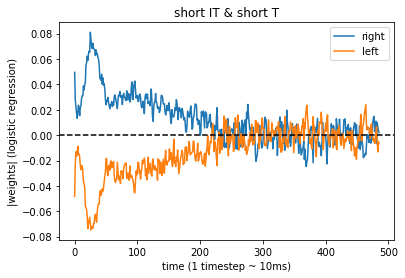

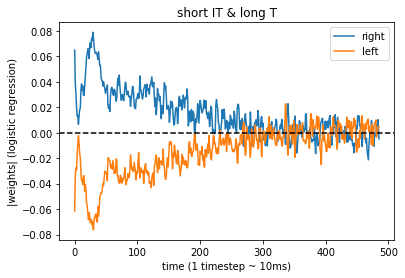

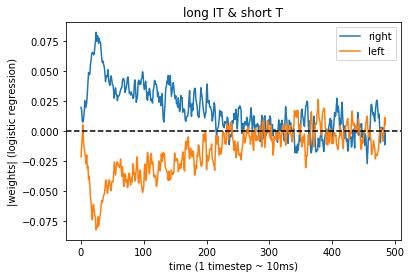

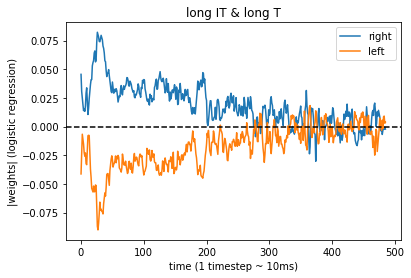

In [39]:
def moving_average(x, w): #in order to smooth the curve of the weights
    return np.convolve(x, np.ones(w), 'valid') / w

conditions_names = ['short IT & short T',\
                    'short IT & long T',\
                    'long IT & short T',\
                    'long IT & long T']
for cond in range(4):
    plt.title(conditions_names[cond])
    mov_average_value = 15
    weights = weights_fitted_subjects_avg[cond,:]
    weights_right = moving_average(weights[2,:],mov_average_value)
    weights_left = moving_average(weights[0,:],mov_average_value)
    plt.plot(weights_right, label='right')
    plt.plot(weights_left, label='left')
    plt.legend()
#     plt.xlim(0,100)
    plt.axhline(y=0,color='black',linestyle='--')
    plt.ylabel("|weights| (logistic regression)")
    plt.xlabel('time (1 timestep ~ 10ms)')
    plt.show()


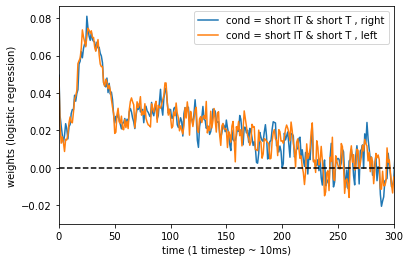

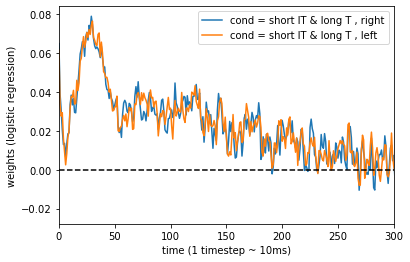

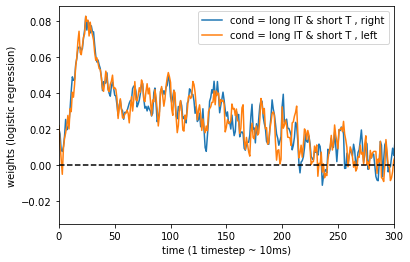

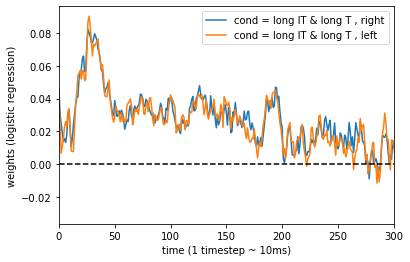

In [36]:
for cond in range(4):
    mov_average_value = 15
    weights = weights_fitted_subjects_avg[cond,:]
    weights_right = moving_average(weights[2,:],mov_average_value)
    weights_left = moving_average(weights[0,:],mov_average_value)
#     plt.plot(weights_right, label='cond = '+str(cond)+" , right")
    plt.plot(weights_right, label='cond = '+str(conditions_names[cond])+" , right")
#     plt.plot(-weights_left, label='cond = '+str(cond)+" , left")
    plt.plot(-weights_left, label='cond = '+str(conditions_names[cond])+" , left")
#     plt.plot(weights_left, label='left')
    plt.legend()
    plt.xlim(0,300)
    plt.axhline(y=0,color='black',linestyle='--')
    plt.xlabel('time (1 timestep ~ 10ms)')
    plt.ylabel("|weights| (logistic regression)")
    plt.show()

The weights seem really really similar - check that there is no mistake.

TODO: understand why the weight is large for t=0

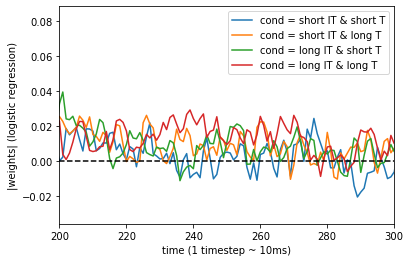

In [38]:
for cond in range(4):
    mov_average_value = 15
    weights = weights_fitted_subjects_avg[cond,:]
    weights_right = moving_average(weights[2,:],mov_average_value)
    weights_left = moving_average(weights[0,:],mov_average_value)
#     plt.plot(weights_right, label='cond = '+str(cond))
    plt.plot(weights_right, label='cond = '+str(conditions_names[cond]))
#     plt.plot(weights_left, label='left')
plt.legend()
plt.xlim(200,300)
plt.axhline(y=0,color='black',linestyle='--')
plt.xlabel('time (1 timestep ~ 10ms)')
plt.ylabel("|weights| (logistic regression)")
plt.show()

It seems that the orange and red weights decrease slower than blue and green. It would mean that the integration kernel is determined only by the length of the trial (and not on the inter-trial interval)